In [1]:
from fastai2.torch_basics import *
from fastai2.test import *
from fastai2.data.all import *
from fastai2.vision.core import *
from fastai2.notebook.showdoc import *

from pathlib import Path
from PIL import Image

In [2]:
source = Path("../DATA")

In [3]:
items = get_image_files(source)
split_idx = RandomSplitter()(items)

In [4]:
fn = items[8]; fn

PosixPath('../DATA/1MZK_0000_542_21_5r__rot_-1.0.jpg')

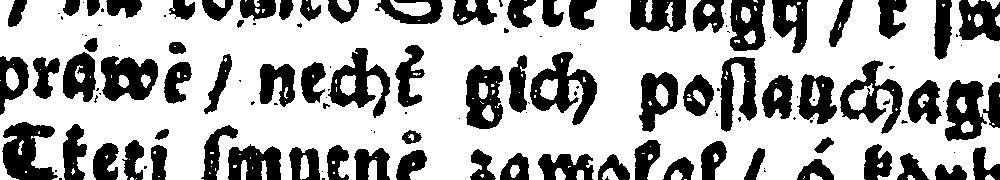

In [5]:
img = PILImage.create(fn); img

In [6]:
tconv = ToTensor()
img = tconv(img)
img.shape,type(img)

(torch.Size([3, 180, 1000]), fastai2.transform.TensorImage)

In [7]:
fnames = get_image_files(source)

In [8]:
fnames[:3]

(#3) [../DATA/0MZK_0000_316_04_4r__rot_0.5.jpg,../DATA/1MZK_0000_175_34_7r__rot_-4.5.jpg,../DATA/1MZK_0000_203_12_02r__rot_-4.0.jpg]

In [45]:
def resized_image(fn:Path, h=18, w=100):
    x = Image.open(fn).convert('RGB').resize((w,h))
    # Convert image to tensor for modeling
    return tensor(array(x)).permute(2,0,1).float()/255.

In [46]:
class TitledImage(Tuple):
    def show(self, ctx=None, **kwargs): show_titled_image(self, ctx=ctx, **kwargs)

In [47]:
img = resized_image(items[0])

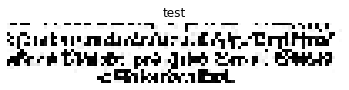

In [48]:
TitledImage(img,'test').show()

In [77]:
img.shape

torch.Size([3, 18, 100])

In [92]:
class PetTfm(Transform):
    def __init__(self, vocab, o2i, lblr): self.vocab,self.o2i,self.lblr = vocab,o2i,lblr
    def encodes(self, o): return resized_image(o), self.o2i[self.lblr(o)]
    def decodes(self, x): return TitledImage(x[0],self.vocab[x[1]])

In [93]:
labeller = RegexLabeller(pat = r'([^_]+).jpg$')
vals = list(map(labeller, items[split_idx[0]]))
vocab,o2i = uniqueify(vals, sort=True, bidir=True)
pets = PetTfm(vocab,o2i,labeller)

In [94]:
x,y = pets(items[3])
x.shape,y

(torch.Size([3, 18, 100]), 13)

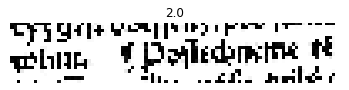

In [95]:
dec = pets.decode((x,y))
dec.show()